<a href="https://colab.research.google.com/github/gabriellesfaria/T1-AM1/blob/master/main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


iris = pd.read_csv('iris.data', header=None)

iris.rename(columns={0:'sepala_altura',
                     1:'sepala_largura',
                     2:'petala_altura',
                     3:'petala_largura',
                     4:'classe'}, inplace=True)

iris

,sepala_altura,sepala_largura,petala_altura,petala_largura,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_data = iris[['sepala_altura', 'sepala_largura', 'petala_altura', 'petala_largura']]
iris_label = iris['classe']

Index(['sepala_altura', 'sepala_largura', 'petala_altura', 'petala_largura'], dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [ ]:
# tamanho dos dados de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
#classificação de treino da árvore
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)     
iris_pred = clf.predict(X_test)     


In [ ]:
acuracia = metrics.accuracy_score(y_test, iris_pred)
print(acuracia) # 0.9555555555555556

0.9555555555555556


[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

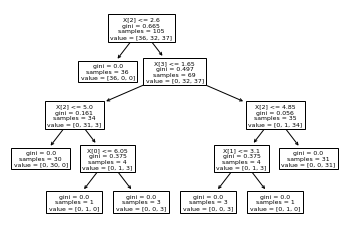

In [ ]:
tree.plot_tree(clf)  # Plotagem original

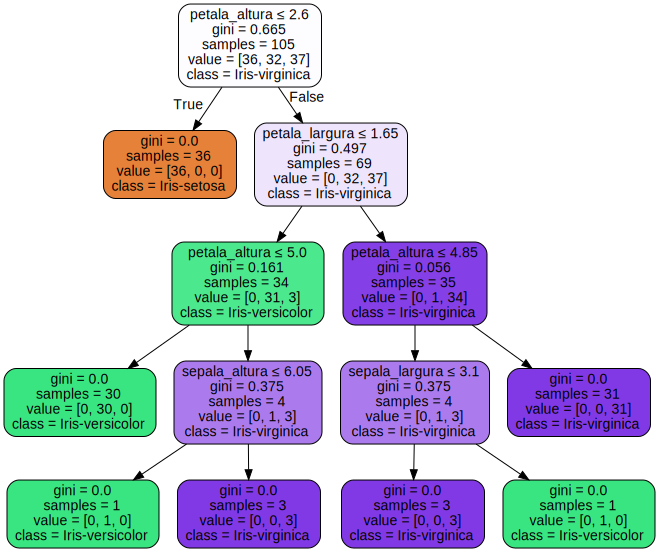

In [ ]:
#Outra plotagem, com mais detalhes
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris_data.columns.unique(),  
                                class_names=iris_label.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

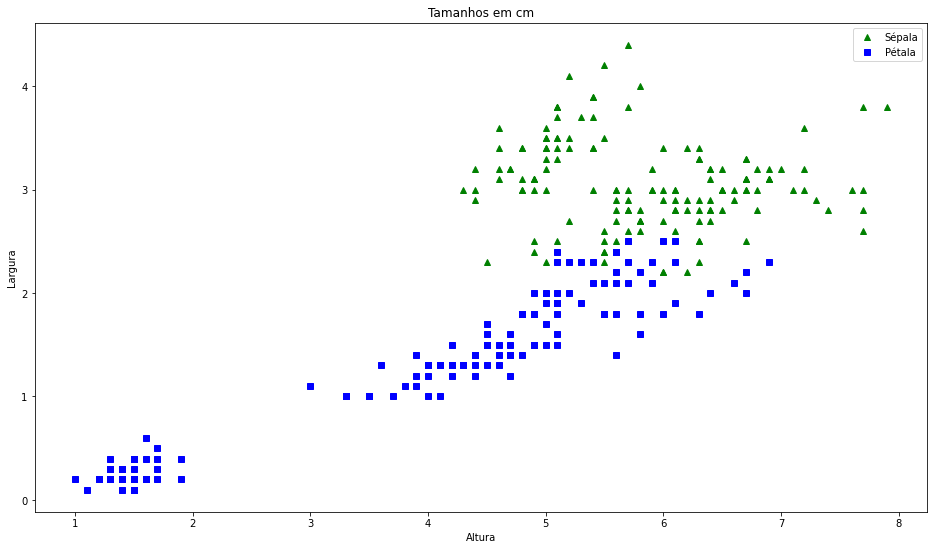

In [ ]:
plt.figure(figsize=(16, 9))
plotada = plt.subplot(111)
plotada.plot(iris['sepala_altura'], iris['sepala_largura'], 'g^', label='Sépala')
plotada.plot(iris['petala_altura'], iris['petala_largura'], 'bs', label='Pétala')
plotada.legend()
plt.title('Tamanhos em cm')
plt.xlabel('Altura')
plt.ylabel('Largura')
plt.show()